In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [2]:
TRAIN_DIR = "../data/chest_xray/chest_xray/train"
VAL_DIR   = "../data/chest_xray/chest_xray/val"
TEST_DIR  = "../data/chest_xray/chest_xray/test"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [7]:
# Get class names
class_names = train_ds.class_names
print("Class names:", class_names)

Class names: ['NORMAL', 'PNEUMONIA']


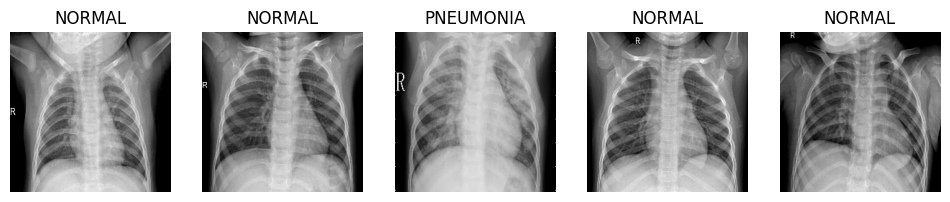

In [8]:
# Take one batch
images, labels = next(iter(train_ds))

plt.figure(figsize=(12, 4))
for i in range(5):  # show 5 sample images
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")
plt.show()

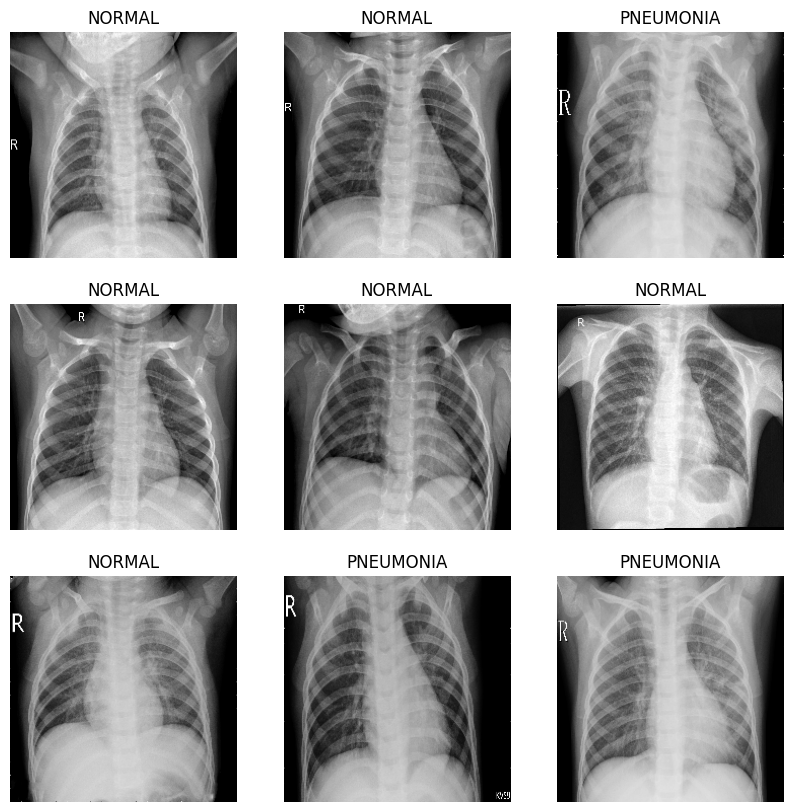

In [9]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")
plt.show()

In [10]:
import collections

def get_class_distribution(dataset):
    class_count = collections.Counter()
    for _, labels in dataset:
        class_count.update([int(x) for x in labels.numpy()])
    return class_count

train_counts = get_class_distribution(train_ds)
val_counts = get_class_distribution(val_ds)
test_counts = get_class_distribution(test_ds)

print("Train class distribution:", train_counts)
print("Validation class distribution:", val_counts)
print("Test class distribution:", test_counts)

/var/folders/m7/0_0fncmd2wjdnnwhtv16d0bw0000gn/T/ipykernel_71022/3443041859.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_count.update([int(x) for x in labels.numpy()])
2026-01-19 17:25:16.530071: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Train class distribution: Counter({1: 3875, 0: 1341})
Validation class distribution: Counter({1: 8, 0: 8})
Test class distribution: Counter({1: 390, 0: 234})


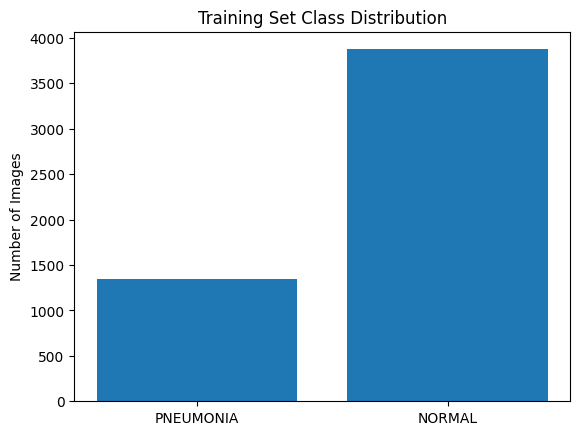

In [11]:
plt.bar(train_counts.keys(), train_counts.values(), tick_label=class_names)
plt.title("Training Set Class Distribution")
plt.ylabel("Number of Images")
plt.show()